In [47]:
import pandas as pd
file_path1 = 'data/경찰청_범죄 발생 시간대 및 요일_20191231.csv'
file_path2 = 'data/경찰청_범죄 발생 지역별 통계_20221231.csv'
file_path3 = 'data/경찰청_범죄 발생 장소별 통계_20221231.csv'

day = pd.read_csv(file_path1, engine='python')
region = pd.read_csv(file_path2, engine='python')
location = pd.read_csv(file_path3, engine='python')
pd.set_option('display.max_rows', 5)

day

,범죄대분류,범죄중분류,0시00분-02시59분,03시00분-05시59분,06시00분-08시59분,09시00분-11시59분,12시00분-14시59분,15시00분-17시59분,18시00분-20시59분,21시00분-23시59분,미상,일,월,화,수,목,금,토
0,강력범죄,살인기수,15,21,20,28,38,33,43,49,50,38,45,48,40,37,49,40
1,강력범죄,살인미수등,33,50,29,44,46,60,66,82,72,71,70,68,62,73,85,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,병역범죄,병역범죄,3,1,20,1440,285,55,58,19,10831,111,3068,3580,1940,2082,1834,97
37,기타범죄,기타범죄,10376,9184,9935,31337,22841,20037,18200,22421,95837,25278,39244,37277,36996,37250,37367,26756


In [166]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path1 = 'data/경찰청_범죄 발생 시간대 및 요일_20191231.csv'
file_path2 = 'data/경찰청_범죄 발생 지역별 통계_20221231.csv'
file_path3 = 'data/경찰청_범죄 발생 장소별 통계_20221231.csv'

day = pd.read_csv(file_path1, engine='python')
region = pd.read_csv(file_path2, engine='python')
location = pd.read_csv(file_path3, engine='python')

data1 = day.groupby(['범죄대분류', '범죄중분류'])
data3 = day.groupby(['0시00분-02시59분'])
data4 = day.groupby(['03시00분-05시59분'])
data5 = day.groupby(['06시00분-08시59분'])
data6 = day.groupby(['09시00분-11시59분'])
data7 = day.groupby(['12시00분-14시59분'])
data8 = day.groupby(['15시00분-17시59분'])
data9 = day.groupby(['18시00분-20시59분'])
data10 = day.groupby(['21시00분-23시59분'])

print(day.iloc[0:3, 0:2]) #범죄대분류  범죄중분류
print(day.iloc[0:3, 2:9]) #0시00분-02시59분  03시00분-05시59분  06시00분-08시59분  09시00분-11시59분  12시00분-14시59분 15시00분-17시59분  18시00분-20시59분  
print(day.iloc[0:3, 10]) #미상
print(day.iloc[0:3, 11:]) #일    월    화    수    목    금    토

  범죄대분류  범죄중분류
0  강력범죄   살인기수
1  강력범죄  살인미수등
2  강력범죄     강도
   0시00분-02시59분  03시00분-05시59분  06시00분-08시59분  09시00분-11시59분  12시00분-14시59분  \
0            15             21             20             28             38   
1            33             50             29             44             46   
2           105            131             44             59             68   

   15시00분-17시59분  18시00분-20시59분  
0             33             43  
1             60             66  
2             72             81  
0     50
1     72
2    131
Name: 미상, dtype: int64
     일    월    화    수    목    금    토
0   38   45   48   40   37   49   40
1   71   70   68   62   73   85   53
2  111  113  116  105  124  121  108


C:\Users\yun\AppData\Local\Temp\ipykernel_28528\1793046725.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crimeData.mean(), palette='Set3')
C:\Users\yun\AppData\Local\Temp\ipykernel_28528\1793046725.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crimeData.mean(), palette='Set3')
C:\Users\yun\AppData\Local\Temp\ipykernel_28528\1793046725.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crimeData.mean(), palette='Set3')
C:\Users\yun\AppData\Local\Temp\ipykernel_28528\1793046725.py:99: FutureWarning: 

Passing `pa

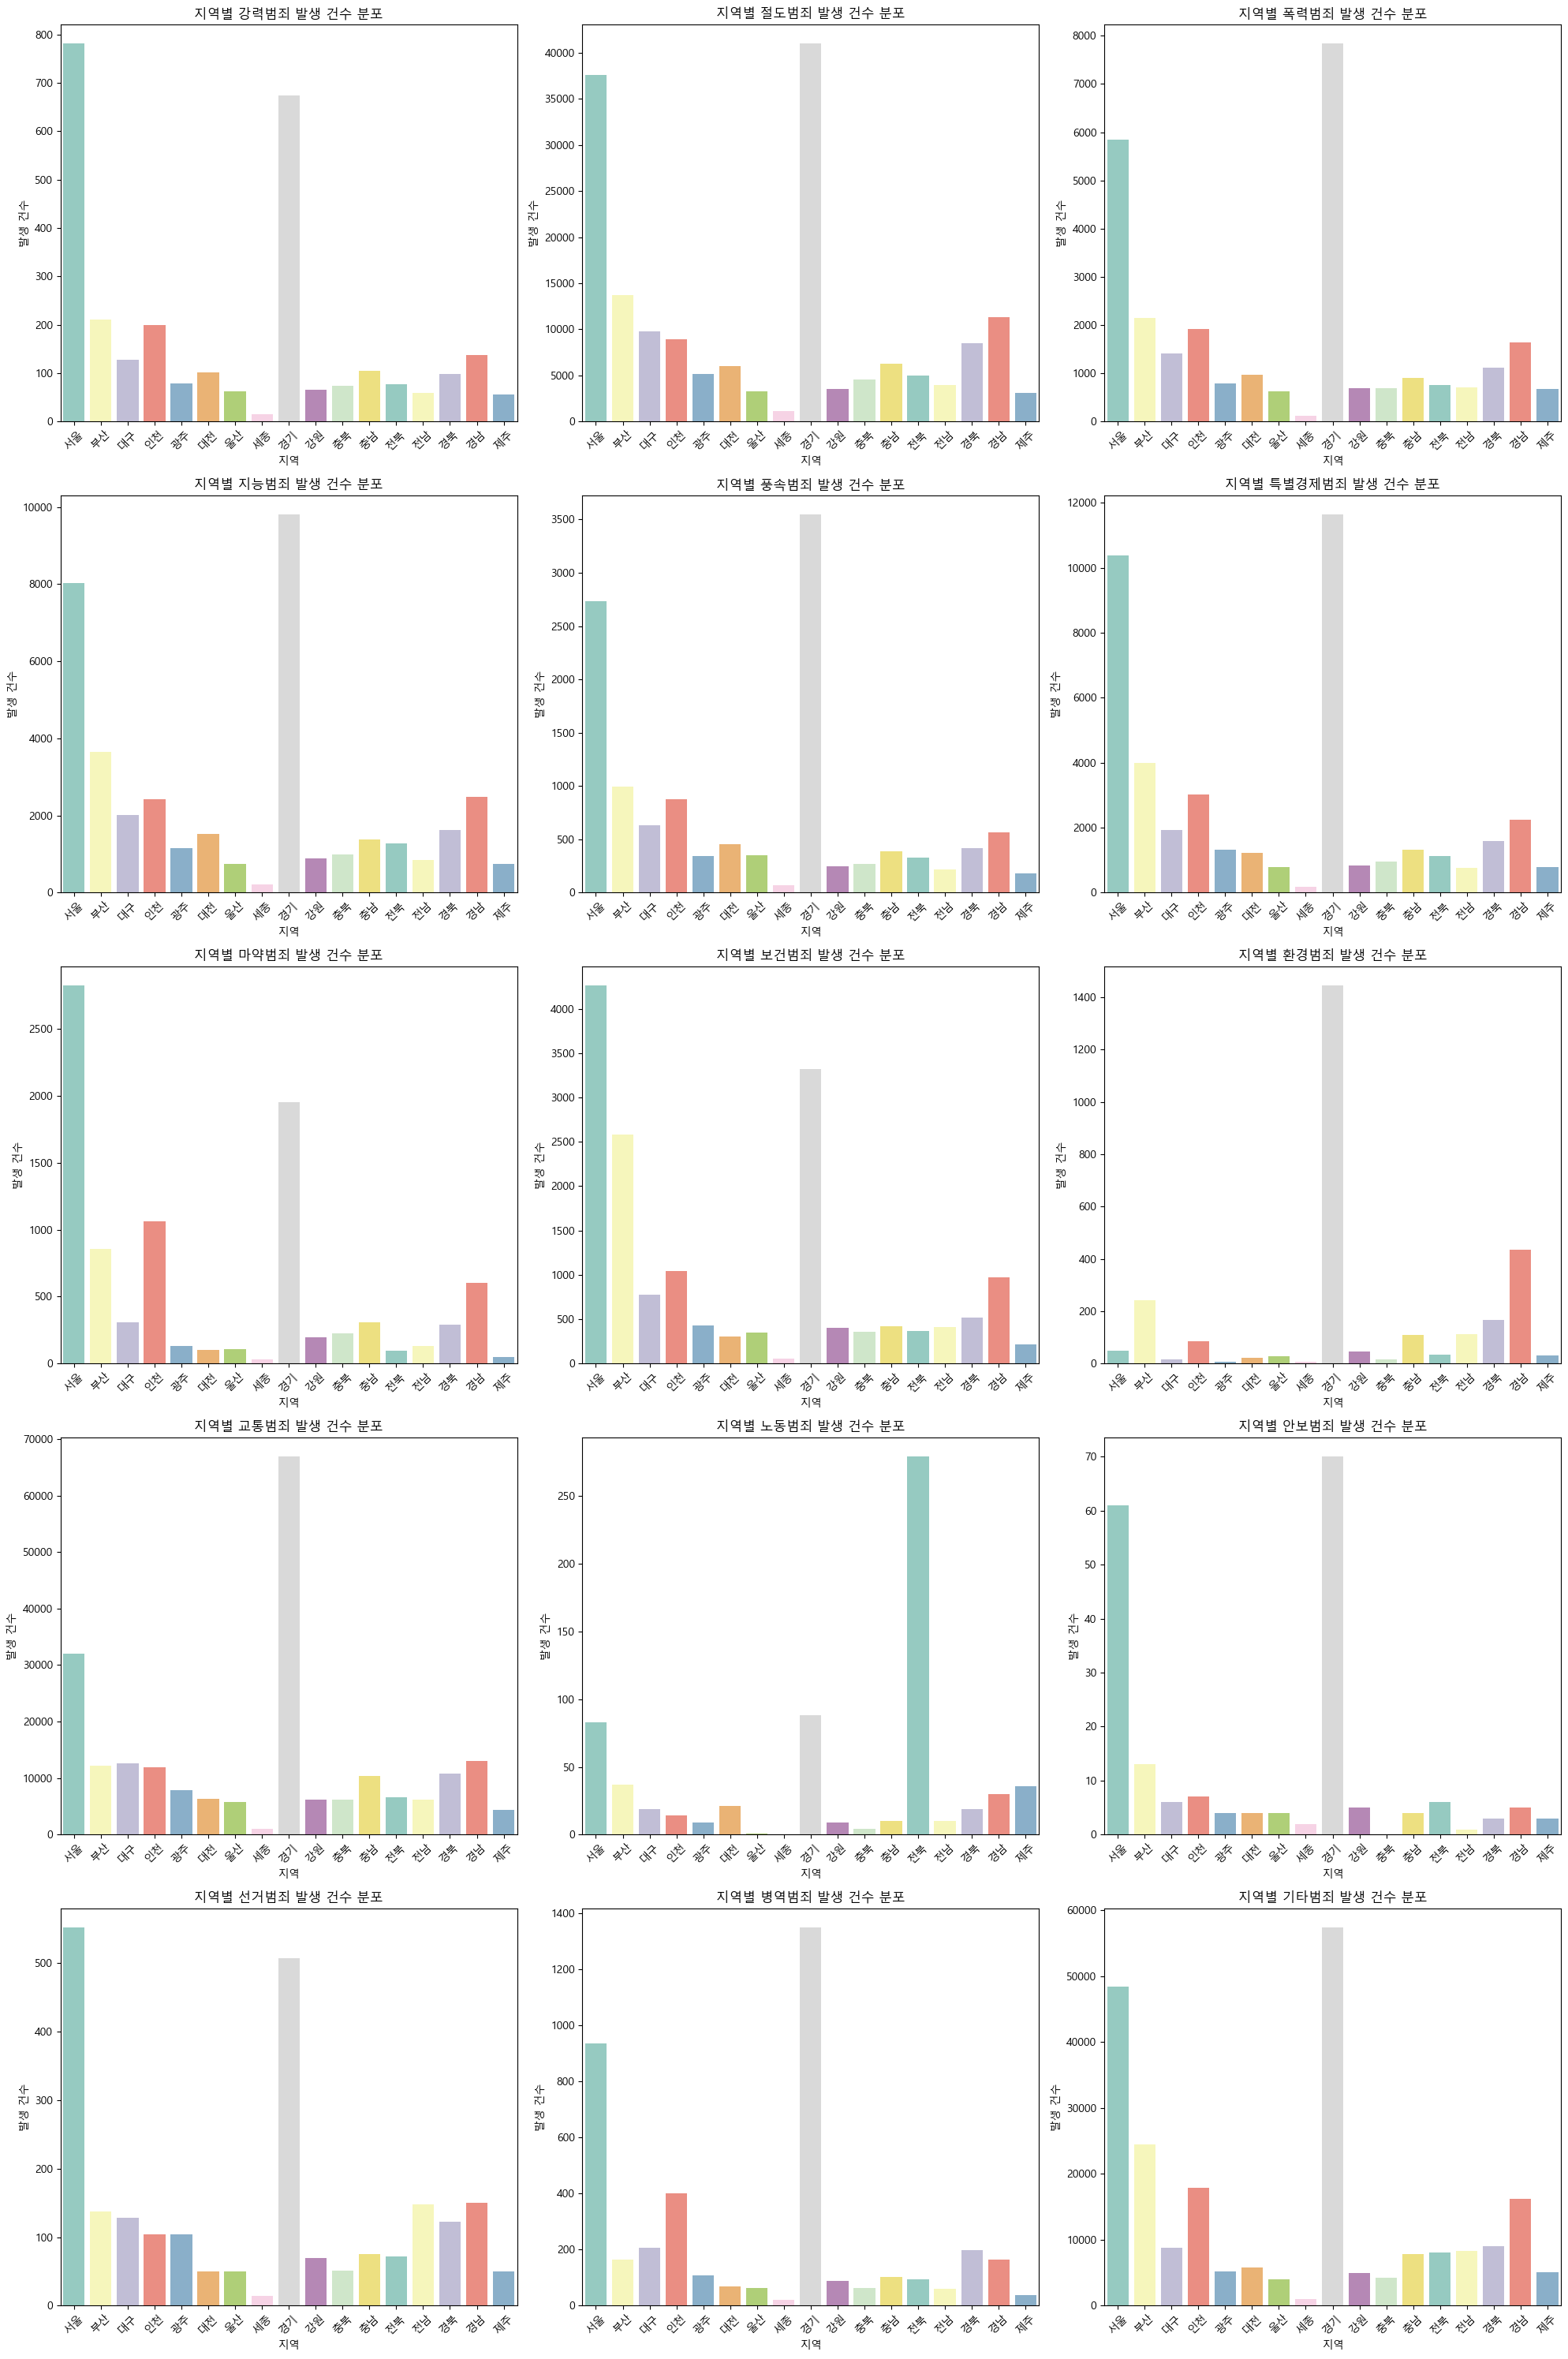

In [188]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')

file_path1 = 'data/경찰청_범죄 발생 시간대 및 요일_20191231.csv'
file_path2 = 'data/경찰청_범죄 발생 지역별 통계_20221231.csv'
file_path3 = 'data/경찰청_범죄 발생 장소별 통계_20221231.csv'

day = pd.read_csv(file_path1, engine='python')
region = pd.read_csv(file_path2, engine='python')
location = pd.read_csv(file_path3, engine='python')

mainCategory = region.groupby(['범죄대분류'])
middleCategory = region.groupby(['범죄중분류'])

# data = mainCategory.get_group(('강력범죄',)).iloc[:, 2:20]
# data 

violent = pd.DataFrame(mainCategory.get_group(('강력범죄',)).iloc[:, 2:])
theft = pd.DataFrame(mainCategory.get_group(('절도범죄',)).iloc[:, 2:])
violence = pd.DataFrame(mainCategory.get_group(('폭력범죄',)).iloc[:, 2:])
intelligence = pd.DataFrame(mainCategory.get_group(('지능범죄',)).iloc[:, 2:])
vice = pd.DataFrame(mainCategory.get_group(('풍속범죄',)).iloc[:, 2:])
special_economic = pd.DataFrame(mainCategory.get_group(('특별경제범죄',)).iloc[:, 2:])
drug = pd.DataFrame(mainCategory.get_group(('마약범죄',)).iloc[:, 2:])
health = pd.DataFrame(mainCategory.get_group(('보건범죄',)).iloc[:, 2:])
environment = pd.DataFrame(mainCategory.get_group(('환경범죄',)).iloc[:, 2:])
traffic = pd.DataFrame(mainCategory.get_group(('교통범죄',)).iloc[:, 2:])
labor = pd.DataFrame(mainCategory.get_group(('노동범죄',)).iloc[:, 2:])
security = pd.DataFrame(mainCategory.get_group(('안보범죄',)).iloc[:, 2:])
election = pd.DataFrame(mainCategory.get_group(('선거범죄',)).iloc[:, 2:])
military = pd.DataFrame(mainCategory.get_group(('병역범죄',)).iloc[:, 2:])
other = pd.DataFrame(mainCategory.get_group(('기타범죄',)).iloc[:, 2:])

crimeTypeList = [violent, theft, violence, intelligence, vice, special_economic, drug, health, environment, traffic, labor, security, election, military, other]
titleList = ['강력범죄', '절도범죄', '폭력범죄', '지능범죄', '풍속범죄', '특별경제범죄', '마약범죄', '보건범죄', '환경범죄', '교통범죄', '노동범죄', '안보범죄', '선거범죄', '병역범죄', '기타범죄']

# gyeonggi = [col for col in violent.columns if col.startswith('경기')]
# gangwon = [col for col in violent.columns if col.startswith('강원')]
# chungbuk = [col for col in violent.columns if col.startswith('충북')]
# chungnam = [col for col in violent.columns if col.startswith('충남')]
# jeonbuk = [col for col in violent.columns if col.startswith('전북')]
# jeonnam = [col for col in violent.columns if col.startswith('전남')]
# gyeongbuk = [col for col in violent.columns if col.startswith('경북')]
# gyeongnam = [col for col in violent.columns if col.startswith('경남')]
# jeju = [col for col in violent.columns if col.startswith('제주')]

# violent['경기'] = violent[gyeonggi].sum(axis=1)
# violent['강원'] = violent[gangwon].sum(axis=1)
# violent['충북'] = violent[chungbuk].sum(axis=1)
# violent['충남'] = violent[chungnam].sum(axis=1)
# violent['전북'] = violent[jeonbuk].sum(axis=1)
# violent['전남'] = violent[jeonnam].sum(axis=1)
# violent['경북'] = violent[gyeongbuk].sum(axis=1)
# violent['경남'] = violent[gyeongnam].sum(axis=1)
# violent['제주'] = violent[jeju].sum(axis=1)

# violent.drop(columns=(gyeonggi + gangwon + chungbuk + chungnam + 
#                      jeonbuk + jeonnam + gyeongbuk + gyeongnam +
#                      jeju + ['기타도시'] + ['도시이외']), inplace=True)

# violent

def processCrimeData(type):
    gyeonggi = [col for col in type.columns if col.startswith('경기')]
    gangwon = [col for col in type.columns if col.startswith('강원')]
    chungbuk = [col for col in type.columns if col.startswith('충북')]
    chungnam = [col for col in type.columns if col.startswith('충남')]
    jeonbuk = [col for col in type.columns if col.startswith('전북')]
    jeonnam = [col for col in type.columns if col.startswith('전남')]
    gyeongbuk = [col for col in type.columns if col.startswith('경북')]
    gyeongnam = [col for col in type.columns if col.startswith('경남')]
    jeju = [col for col in type.columns if col.startswith('제주')]

    type['경기'] = type[gyeonggi].sum(axis=1)
    type['강원'] = type[gangwon].sum(axis=1)
    type['충북'] = type[chungbuk].sum(axis=1)
    type['충남'] = type[chungnam].sum(axis=1)
    type['전북'] = type[jeonbuk].sum(axis=1)
    type['전남'] = type[jeonnam].sum(axis=1)
    type['경북'] = type[gyeongbuk].sum(axis=1)
    type['경남'] = type[gyeongnam].sum(axis=1)
    type['제주'] = type[jeju].sum(axis=1)

    type.drop(columns=(gyeonggi + gangwon + chungbuk + chungnam + 
                                jeonbuk + jeonnam + gyeongbuk + gyeongnam +
                                jeju + ['기타도시'] + ['도시이외']), inplace=True)
    return type

for i in range(len(crimeTypeList)):
    crimeTypeList[i] = processCrimeData(crimeTypeList[i])

plt.figure(figsize=(20, 30))

for i, (crimeData, title) in enumerate(zip(crimeTypeList, titleList), 1):
    plt.subplot(5, 3, i)
    sns.barplot(data=crimeData.mean(), palette='Set3')
    plt.title(f'지역별 {title} 발생 건수 분포')
    plt.xlabel('지역')
    plt.ylabel('발생 건수')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# plt.figure(figsize=(10, 6))
# sns.barplot(data=violent.mean(), palette='Set3')
# plt.title('지역별 강력범죄 발생 건수 분포')
# plt.xlabel('지역')
# plt.ylabel('발생 건수')
# plt.xticks(rotation=45)  # x축 레이블 회전

WMS 서비스 응답 확인


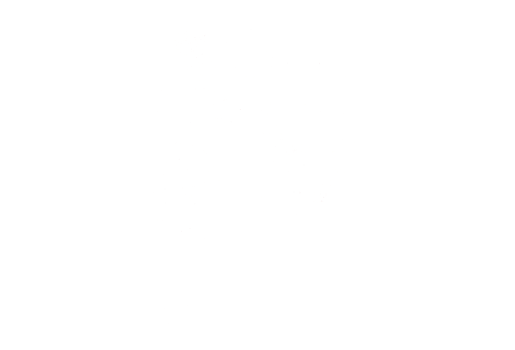

In [ ]:
import requests
from owslib.wms import WebMapService
import matplotlib.pyplot as plt

# WMS 서비스 URL
api_key = 'U42BJJFV-U42B-U42B-U42B-U42BJJFVJ1'  # 실제 API 키로 대체하세요
wms_base_url = 'http://www.safemap.go.kr/openApiService/wms/getLayerData.do'
params = {
    'apikey': api_key,
    'service': 'WMS',
    'version': '1.1.1',
    'request': 'GetMap',
    'layers': 'A2SM_CRMNLHSPOT_TOT',  # 확인한 올바른 레이어 이름
    'styles': 'A2SM_CrmnlHspot_Tot_Tot',
    'bbox': '124.0,33.0,132.0,38.0',  # 대한민국 범위
    'width': 600,
    'height': 400,
    'srs': 'EPSG:4326',
    'format': 'image/png',
    'transparent': 'true',
    'exceptions': 'text/xml',
    'isBaseLayer': 'False'
}

# WMS 요청
response = requests.get(wms_base_url, params=params)

if response.status_code == 200:
    print("WMS 서비스 응답 확인")
    
    # 이미지 저장
    with open('wms_image.png', 'wb') as f:
        f.write(response.content)
    
    # 이미지 표시
    img = plt.imread('wms_image.png')
    plt.imshow(img)
    plt.axis('off')
    plt.show()
else:
    print("WMS 서비스 응답 오류:", response.status_code)
    print(response.text)


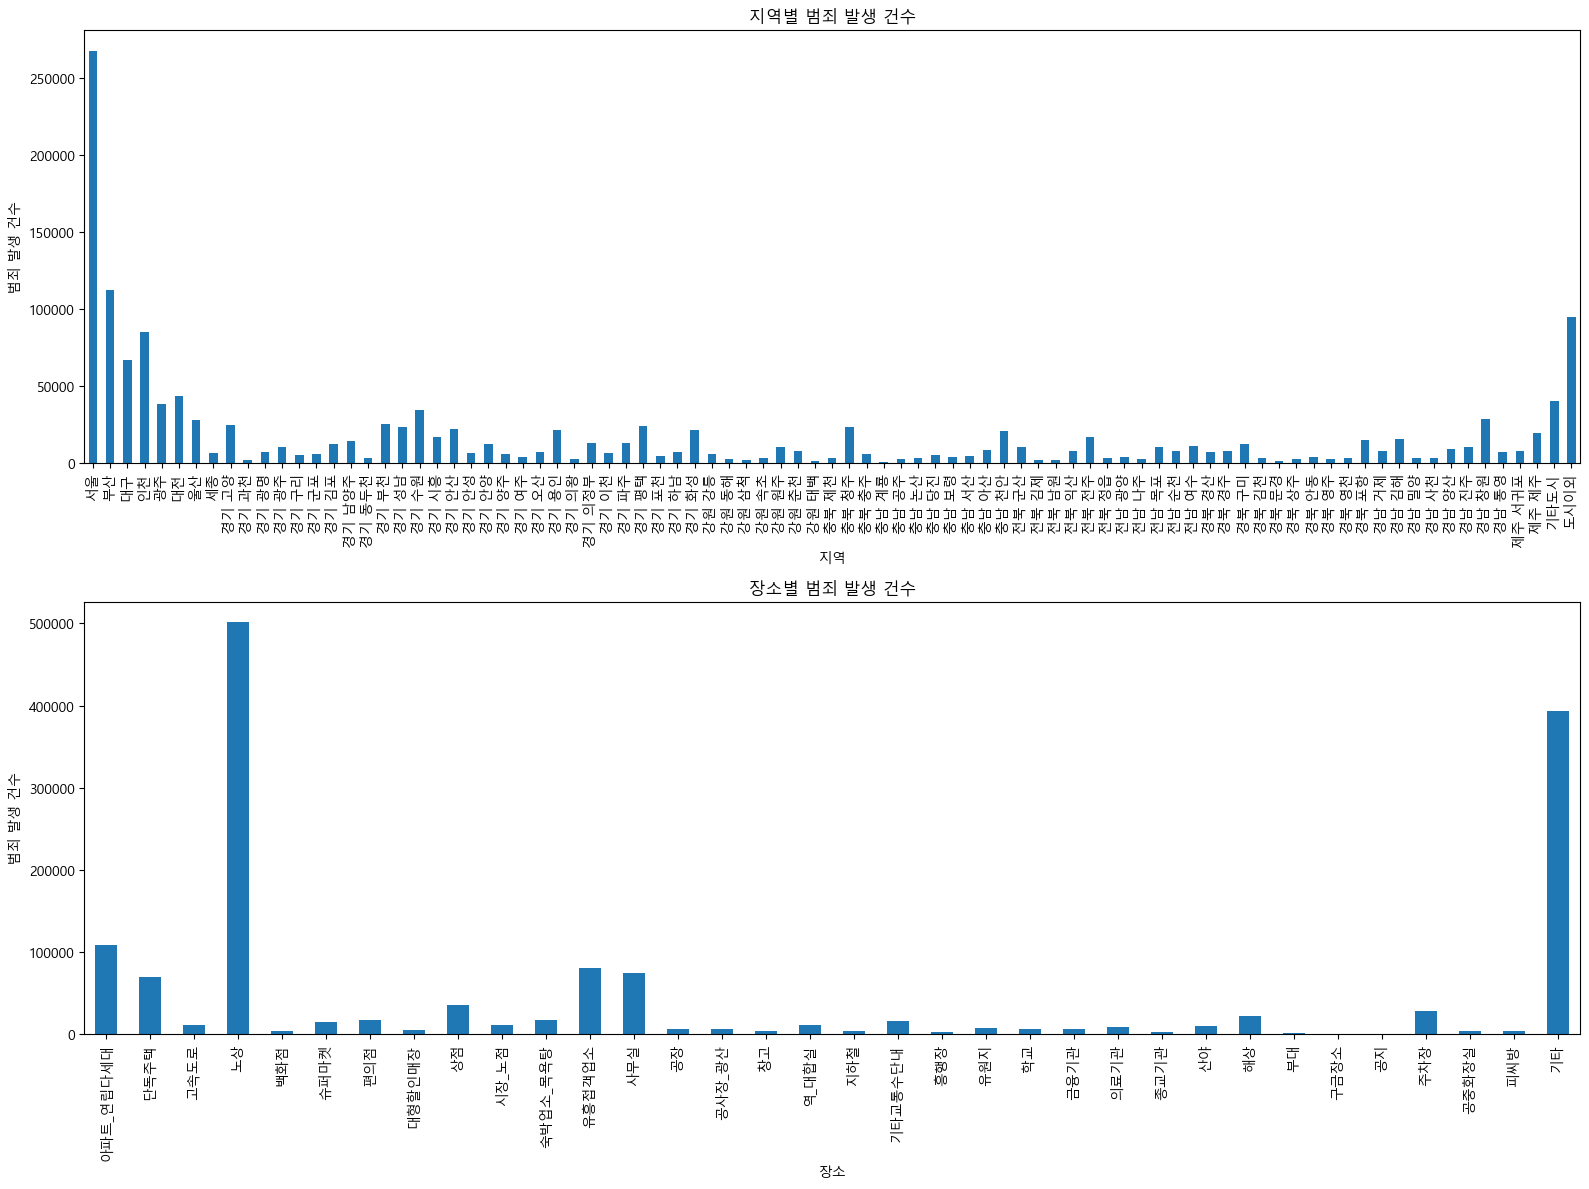

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 데이터셋 로드
file_path1 = 'data/경찰청_범죄 발생 시간대 및 요일_20191231.csv'
file_path2 = 'data/경찰청_범죄 발생 지역별 통계_20221231.csv'
file_path3 = 'data/경찰청_범죄 발생 장소별 통계_20221231.csv'

day = pd.read_csv(file_path1, engine='python')
region = pd.read_csv(file_path2, engine='python')
location = pd.read_csv(file_path3, engine='python')

# 지역별 범죄 발생 건수
crime_sum_by_area = region.sum()[2:]

# 장소별 범죄 발생 건수
crime_sum_by_location = location.sum()[2:]

# 4분할로 그래프 그리기
plt.figure(figsize=(16, 12))

# 지역별 범죄 발생 건수
plt.subplot(2, 1, 1)
crime_sum_by_area.plot(kind='bar')
plt.title('지역별 범죄 발생 건수')
plt.xlabel('지역')
plt.ylabel('범죄 발생 건수')

# 장소별 범죄 발생 건수
plt.subplot(2, 1, 2)
crime_sum_by_location.plot(kind='bar')
plt.title('장소별 범죄 발생 건수')
plt.xlabel('장소')
plt.ylabel('범죄 발생 건수')

plt.tight_layout()
plt.show()


In [90]:
import folium

m = folium.Map(location=[35.1609, 126.8515], zoom_start=12)

wms_url = ('https://geo.safemap.go.kr/geoserver/safemap/wms?apikey=U42BJJFV-U42B-U42B-U42B-U42BJJFVJ1')

wms_layer = folium.raster_layers.WmsTileLayer(
    url=wms_url,
    layers='A2SM_CRMNLHSPOT_TOT',
    styles='A2SM_CrmnlHspot_Tot_Tot',
    fmt='image/png',
    transparent=True,
    FORMAT='image/png',
    EXCEPTIONS='text/xml',
    TRANSPARENT='TRUE',
    SERVICE='WMS',
    VERSION='1.1.1',
    REQUEST='GetMap',
    SRS='EPSG:900913',
    BBOX='14139627.236972,4525683.569098,14139932.985085,4525989.3172111',
    WIDTH='256',
    HEIGHT='256'
)

wms_layer.add_to(m)

m.save("map.html")


In [207]:
import folium
import pandas as pd

# 예시 데이터 생성
region_data = {
    '지역명': ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기 고양', '경기 과천'],
    '범죄건수': [100, 80, 60, 40, 20, 30, 25, 10, 50, 30],
    '위도': [37.5665, 35.1796, 35.8714, 37.4563, 35.1595, 36.3504, 35.5384, 36.4801, 37.6584, 37.4264],  # 예시 위도
    '경도': [126.9780, 129.0756, 128.6014, 126.7052, 126.8526, 127.3845, 129.3114, 127.2892, 126.8320, 126.9875]  # 예시 경도
}

# 데이터프레임 생성
region = pd.DataFrame(region_data)

# 중심 지점 설정
map_center = [36.3504, 127.3845]  # 대한민국 중심 위도, 경도

# Folium 지도 객체 생성
m = folium.Map(location=map_center, zoom_start=7)

# 각 지역에 대한 마커 추가
for idx, row in region.iterrows():
    folium.Marker(location=[row['위도'], row['경도']], 
                  popup=f"{row['범죄건수']}").add_to(m)

# 지도 표시
m


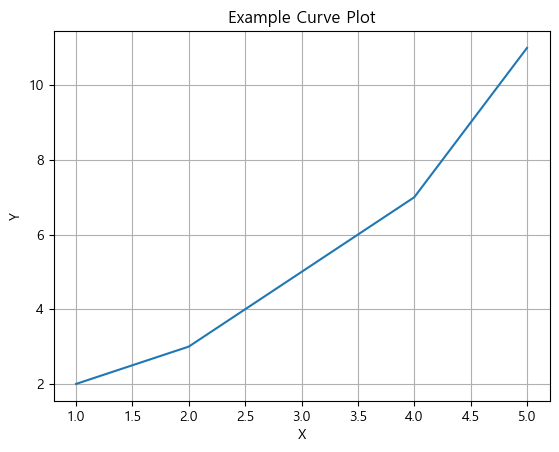

In [208]:
import seaborn as sns

# 데이터 생성
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# 곡선 그래프 그리기
sns.lineplot(x=x, y=y)
plt.title('Example Curve Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)  # 그리드 추가
plt.show()